In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df= pd.read_csv("D:\Pritesh\ML\web scrapping\Smart Watch.csv")
df.head()

,Unnamed: 0,Brand,Model Name,Display Size,Operating System,Call Function,Bluetooth,Wi_Fi,GPS,Display_Type,Display_Resolution,Touchscreen,Water_Resistance,Battery_Life,Price
0,0,beatXP Marv Neo,Marv Neo 1.85'',46.00,Android & iOS,Yes,Yes,No,No,Other,260.0,Yes,NaN,7.0,1299
1,1,"Boult Craft 1.83""","Craft 1.83"" HD",46.48,Android & iOS,Yes,Yes,No,No,IPS TFt,262.0,Yes,1.5,7.0,1099
2,2,beatXP Vega X,"Vega X 1.43""",36.32,Android & iOS,Yes,Yes,No,No,Super AMOLED,466.0,Yes,1.5,7.0,1999
3,3,beatXP Sigma 1.38'',Sigma 1.38'' HD,35.05,Android & iOS,Yes,Yes,No,No,Other,NaN,Yes,NaN,7.0,1199
4,4,KARBONN KX30,KX30,61.00,NaN,No,No,No,No,IPS TFt,NaN,No,NaN,NaN,1299


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          569 non-null    int64  
 1   Brand               569 non-null    object 
 2   Model Name          569 non-null    object 
 3   Display Size        550 non-null    float64
 4   Operating System    498 non-null    object 
 5   Call Function       569 non-null    object 
 6   Bluetooth           569 non-null    object 
 7   Wi_Fi               569 non-null    object 
 8   GPS                 569 non-null    object 
 9   Display_Type        569 non-null    object 
 10  Display_Resolution  438 non-null    float64
 11  Touchscreen         569 non-null    object 
 12  Water_Resistance    273 non-null    float64
 13  Battery_Life        495 non-null    float64
 14  Price               569 non-null    int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 66.8+ KB

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

Unnamed: 0              0
Brand                   0
Model Name              0
Display Size           19
Operating System       71
Call Function           0
Bluetooth               0
Wi_Fi                   0
GPS                     0
Display_Type            0
Display_Resolution    131
Touchscreen             0
Water_Resistance      296
Battery_Life           74
Price                   0
dtype: int64

In [15]:
df.drop(columns='Unnamed: 0',inplace=True)
df.drop(columns='Model Name',inplace=True)
df.drop(columns='Water_Resistance',inplace=True)

In [16]:
df['Brand'] = df['Brand'].str.split(" ",n=1,expand=True)[0]

In [17]:
brand = df['Brand'].value_counts()

In [18]:
other_brand = brand[brand<5].index.to_list()
df['Brand'] = df['Brand'].apply([lambda x: "others" if x in other_brand else x])

In [19]:
df['Display Size'].fillna(df['Display Size'].mean(),inplace=True)

In [22]:
df['Operating System'] = df['Operating System'].str.replace("Proprietary OS","Others").str.replace("Windows","Others")


In [29]:
df['Operating System'].fillna(df['Operating System'].mode().iloc[0],inplace=True)

In [34]:
df['Call Function'] = df["Call Function"].str.replace("Yes","1").str.replace("No","0").astype("int")

In [37]:
df['GPS'] = df["GPS"].str.replace("Yes","1").str.replace("No","0").astype("int")
df['Bluetooth'] = df["Bluetooth"].str.replace("Yes","1").str.replace("No","0").astype("int")
df['Wi_Fi'] = df["Wi_Fi"].str.replace("Yes","1").str.replace("No","0").astype("int")
df['Touchscreen'] = df["Touchscreen"].str.replace("Yes","1").str.replace("No","0").astype("int")

In [43]:
df['Display_Resolution'].fillna(df['Display_Resolution'].mean(),inplace=True)

In [45]:
df['Battery_Life'].fillna(df['Battery_Life'].mean(),inplace=True)

In [46]:
df['Price']

0      1299
1      1099
2      1999
3      1199
4      1299
       ... 
564     800
565    3999
566     650
567    1499
568    2999
Name: Price, Length: 569, dtype: int64

In [47]:
df.sample(10)

,Brand,Display Size,Operating System,Call Function,Bluetooth,Wi_Fi,GPS,Display_Type,Display_Resolution,Touchscreen,Battery_Life,Price
416,Fastrack,49.530000,Android & iOS,1,1,0,0,IPS LCD,261.000000,1,5.000000,2299
499,others,60.482135,Android & iOS,1,1,0,0,IPS TFt,240.000000,1,2.000000,823
563,others,49.000000,Android,1,1,1,1,Other,550.000000,1,1.500000,639
558,Fire-Boltt,45.212000,Android & iOS,1,1,0,0,AMOLED,408.000000,1,7.000000,2999
543,others,45.000000,Android & iOS,1,1,1,1,TFT LED,373.977169,1,10.000000,799
47,Pebble,35.300000,Android & iOS,1,1,0,0,HD,373.977169,1,7.000000,1299
216,Apple,41.000000,iOS,1,1,1,1,OLED Retina,391.000000,1,0.750000,27999
363,others,61.000000,Android & iOS,0,0,0,0,Other,373.977169,0,7.697054,1169
485,MOTOROLA,165.100000,Android & iOS,0,0,1,0,IPS LCD,373.977169,1,7.697054,7399
167,Noise,46.990000,Android & iOS,1,1,0,0,IPS TFt,262.000000,1,7.000000,1399


<Axes: >

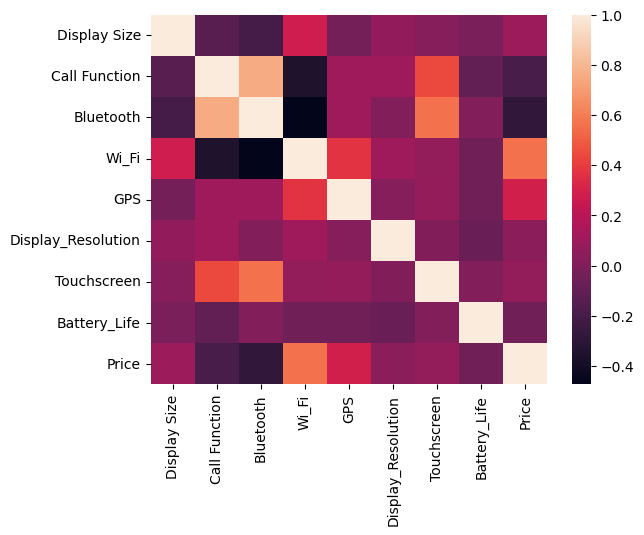

In [48]:
sns.heatmap(df.corr(numeric_only=True))

C:\Users\admin\AppData\Local\Temp\ipykernel_18544\824416946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Price)


<Axes: xlabel='Price', ylabel='Density'>

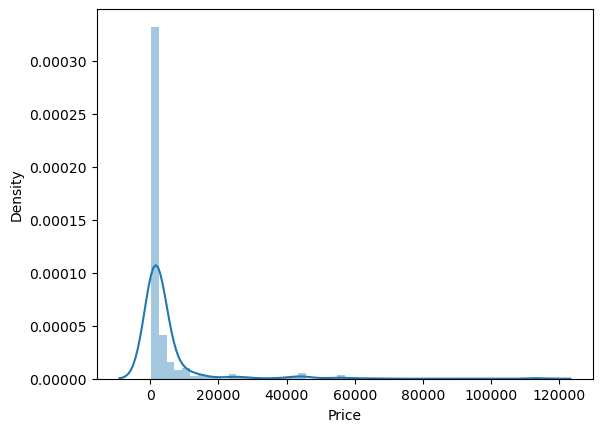

In [49]:
sns.distplot(df.Price)

<Axes: xlabel='Brand'>

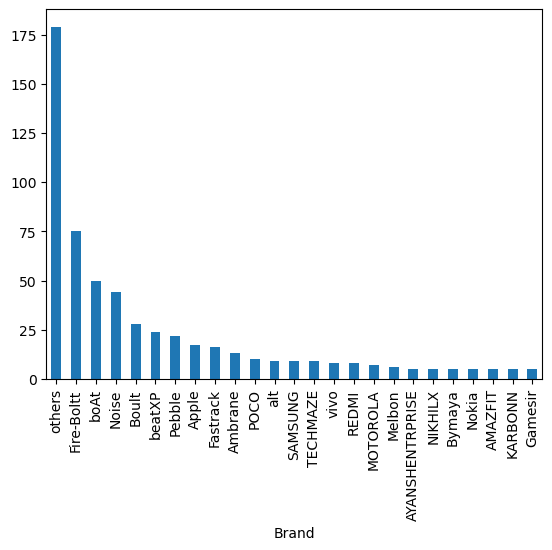

In [51]:
df['Brand'].value_counts().plot(kind = 'bar')

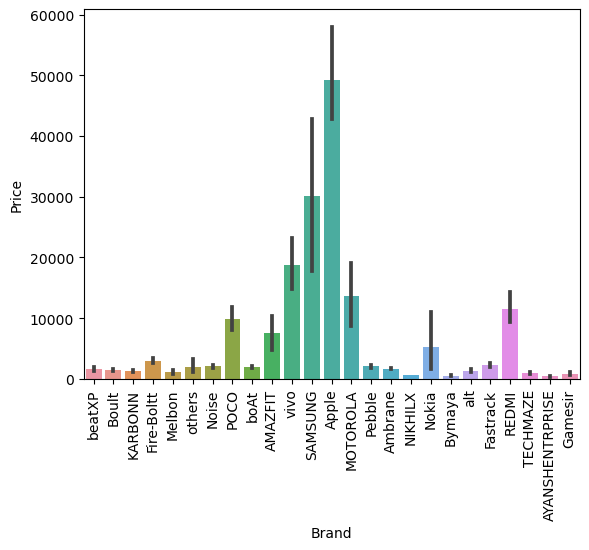

In [52]:
sns.barplot(x=df.Brand,y=df.Price)
plt.xticks(rotation = 'vertical')
plt.show()

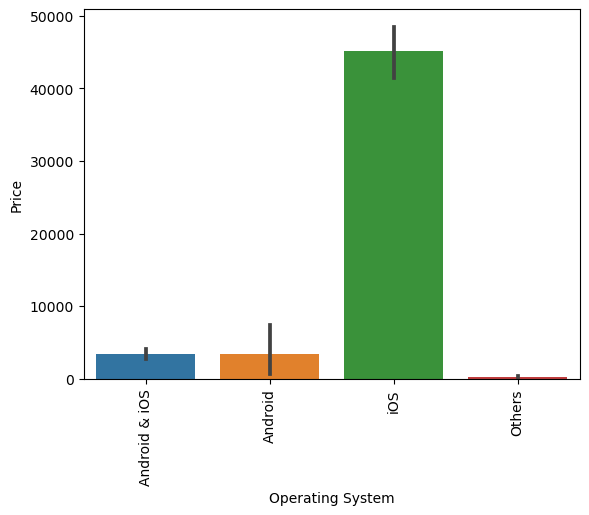

In [53]:
sns.barplot(x=df['Operating System'],y=df.Price)
plt.xticks(rotation = "vertical")
plt.show()

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

C:\Users\admin\AppData\Local\Temp\ipykernel_18544\3309387210.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y)


<Axes: xlabel='Price', ylabel='Density'>

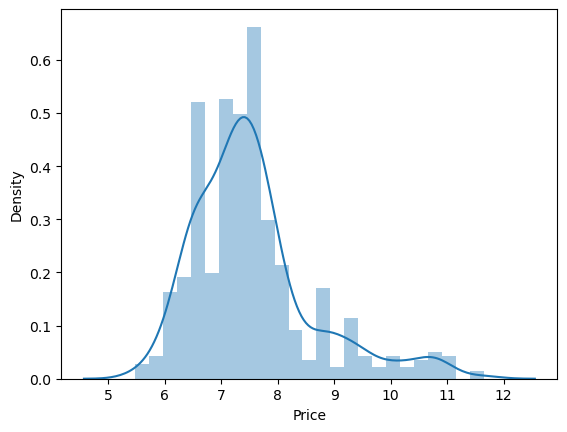

In [55]:
X= df.drop(columns="Price")
Y = np.log(df['Price'])
sns.distplot(Y)

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [57]:
X_train

,Brand,Display Size,Operating System,Call Function,Bluetooth,Wi_Fi,GPS,Display_Type,Display_Resolution,Touchscreen,Battery_Life
340,Melbon,49.00,Android & iOS,1,1,0,0,AMOLED,373.977169,1,3.000000
525,Fire-Boltt,33.02,Android & iOS,1,1,0,0,IPS TFt,240.000000,1,15.000000
85,Boult,36.32,Android & iOS,1,1,0,0,AMOLED,466.000000,1,7.000000
452,boAt,46.40,Android & iOS,1,1,0,0,Other,262.000000,1,7.000000
39,others,43.18,Android & iOS,1,1,0,0,IPS TFt,260.000000,1,3.000000
...,...,...,...,...,...,...,...,...,...,...,...
81,REDMI,172.50,Android & iOS,0,0,1,0,HD,373.977169,1,7.697054
320,boAt,41.91,Android & iOS,0,1,0,0,Other,260.000000,1,10.000000
462,Pebble,48.51,Android & iOS,1,1,0,0,IPS TFt,352.000000,1,0.208333
108,others,50.00,Android & iOS,1,1,1,0,Other,373.977169,1,3.000000


In [58]:
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,2,7])
],remainder='passthrough')
step_2  = LinearRegression()
pipe = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.8831418481959097
MAE 0.2748074901694378


In [59]:
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first',handle_unknown="ignore"),[0,2,7])
],remainder='passthrough')
step_2  = RandomForestRegressor()
pipe_rf = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe_rf.fit(X_train,Y_train)
y_pred = pipe_rf.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.8622557279434144
MAE 0.24072215041349534


In [60]:
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,2,7])
],remainder='passthrough')
step_2  = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.7780600358798055
MAE 0.33207876184466695


In [61]:
from sklearn.tree import DecisionTreeRegressor
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,2,7])
],remainder='passthrough')
step_2  = DecisionTreeRegressor()
pipe = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.8188601302048151
MAE 0.24866414135164736


In [62]:
from xgboost import XGBRegressor
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,2,7])
],remainder='passthrough')
step_2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
pipe = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.8919227561191929
MAE 0.2156227204341565


In [63]:
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first',handle_unknown='infrequent_if_exist'),[0,2,7])
],remainder='passthrough')
step_2 = GradientBoostingRegressor(n_estimators=500,max_depth=15,max_features=0.75,)
pipe = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe.fit(X_train,Y_train)
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))

print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.8717207079312673
MAE 0.224435599232789


In [64]:
def best_rs(X,Y):
    r2_score_ =[]
    try:
        for i in range(1,100):
            X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=i)
            pipe_rf.fit(X_train,Y_train)
            y_pred = pipe_rf.predict(X_test)
            r2_score_.append(r2_score(Y_test,y_pred))
        return r2_score_
    except ValueError as e:
        print("error")

In [65]:
import warnings
warnings.simplefilter("ignore") 

In [66]:
result = best_rs(X,Y)
print(np.argmax(result))

61


In [79]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=62)
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first',handle_unknown="ignore"),[0,2,7])
],remainder='passthrough')
step_2  = RandomForestRegressor()
pipe_rf = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe_rf.fit(X_train,Y_train)
y_pred = pipe_rf.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.9340885528550805
MAE 0.22743530930569428


In [69]:
np.random.seed(42)
from sklearn.model_selection import GridSearchCV
param_dist = {'step2__n_estimators': [50,100,150,200,500],
              'step2__max_depth': [2, 3, 4, 8, 15,None],
              
              'step2__max_samples': [0.5, 0.75, 1.0],
              'step2__max_features': ['sqrt', 'log2', None],
              'step2__criterion': ["squared_error", "absolute_error"]}

cv_rf = GridSearchCV(estimator=pipe_rf, 
                     cv = 5,
                     param_grid=param_dist,
                     n_jobs = -1)

cv_rf.fit(X,Y)

print('Best Parameters using grid search: \n',
      cv_rf.best_params_)

Best Parameters using grid search: 
 {'step2__criterion': 'squared_error', 'step2__max_depth': None, 'step2__max_features': 'log2', 'step2__max_samples': 1.0, 'step2__n_estimators': 100}


In [78]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=62)
step_1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first',handle_unknown='infrequent_if_exist'),[0,2,7])
],remainder='passthrough')
step_2  = RandomForestRegressor(n_estimators=100,
                                max_samples=1.0,
                                max_features='log2',
                                max_depth=None,
                                criterion='squared_error'
)
pipe_rf = Pipeline([('step1',step_1),
                ('step2',step_2)])
pipe_rf.fit(X_train,Y_train)
y_pred = pipe_rf.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.9278030146423276
MAE 0.24210130504822708


In [80]:
import pickle

pickle.dump(df,open('df_smart_watch.pkl','wb'))
pickle.dump(pipe_rf,open('pipe_rf_smart_watch.pkl','wb'))


In [ ]:
query = np.array(['Apple','Mac','Mac',256,8,39.23,'No'])

query = query.reshape(1,7)
np.exp(pipe.predict(query))